# Неделя 4. Четверг

In [3]:
import pandas as pd
import numpy as np
import scipy.stats as st
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline  
import warnings
warnings.filterwarnings('ignore')

In [5]:
transactions = pd.read_csv('aux/transactions.csv').drop('Unnamed: 0', axis=1)
users = pd.read_csv('aux/users.csv').drop('Unnamed: 0', axis=1)

1. Постройте график кумулятивной выручки по группам. Опишите выводы

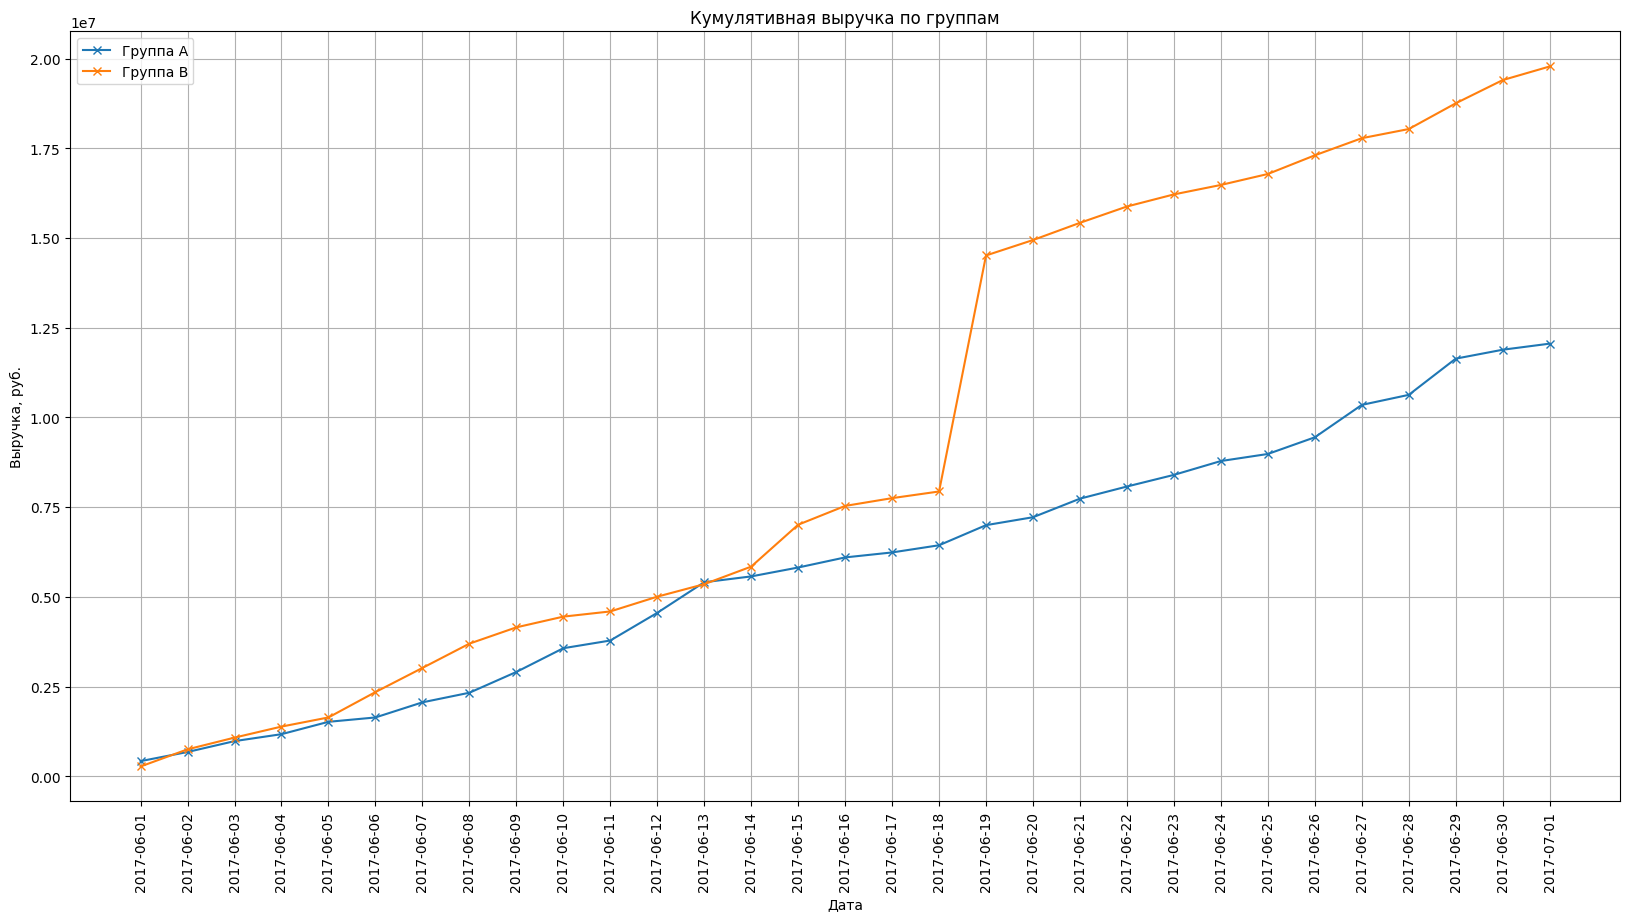

In [66]:
transactions = transactions.sort_values('date')

# сгруппировать данные по дате и группе и вычислить кумулятивную выручку
cumulative_data = transactions.groupby(
    ['date', 'group']
).agg({'revenue':'sum', 'transaction_id':'count'}).groupby(level=[1]).cumsum().reset_index()

cumulative_data.rename(columns={'transaction_id': 'transactions'}, inplace=True)

plt.figure(figsize=(20, 10))
# построить график кумулятивной выручки по группам на каждый день
plt.plot(
    cumulative_data[cumulative_data['group'] == 'A']['date'], 
    cumulative_data[cumulative_data['group'] == 'A']['revenue'],
    marker='x',
    label='Группа A'
)

plt.plot(
    cumulative_data[cumulative_revenue['group'] == 'B']['date'], 
    cumulative_data[cumulative_revenue['group'] == 'B']['revenue'], 
    marker='x',
    label='Группа B'
)

# настройка отображения графика
plt.title('Кумулятивная выручка по группам')
plt.xlabel('Дата')
plt.ylabel('Выручка, руб.')
plt.legend()
plt.xticks(rotation=90)
plt.grid()
plt.show()

2. Постройте график кумулятивного среднего чека по группам. Опишите выводы

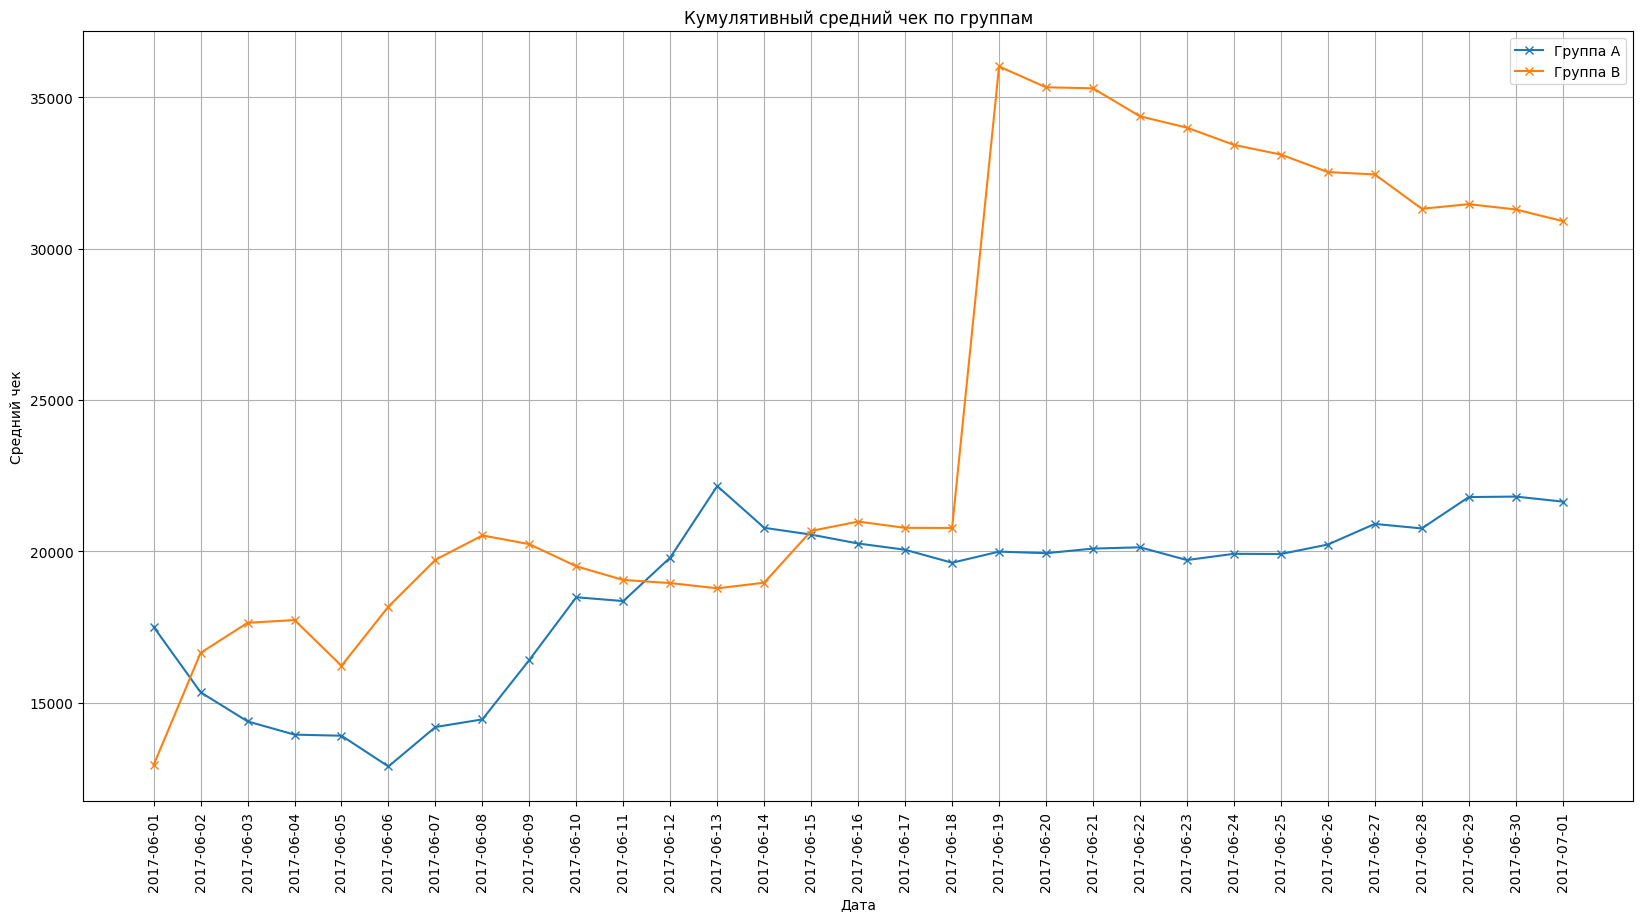

In [67]:
# вычислить кумулятивный средний чек
cumulative_data['avg_check'] = cumulative_data['revenue'] / cumulative_data['transactions']



plt.figure(figsize=(20, 10))
# построить график кумулятивного среднего чека по группам на каждый день
plt.plot(cumulative_data[cumulative_data['group'] == 'A']['date'], 
         cumulative_data[cumulative_data['group'] == 'A']['avg_check'],
         marker='x',
         label='Группа A'
        )
plt.plot(cumulative_data[cumulative_data['group'] == 'B']['date'], 
         cumulative_data[cumulative_data['group'] == 'B']['avg_check'], 
         marker='x',
         label='Группа B'
        )

# настройка отображения графика
plt.title('Кумулятивный средний чек по группам')
plt.xlabel('Дата')
plt.ylabel('Средний чек')
plt.legend()
plt.xticks(rotation=90)
plt.grid()
plt.show()

3. График относительного изменения кумулятивного среднего чека группы B к группе A. Опишите выводы

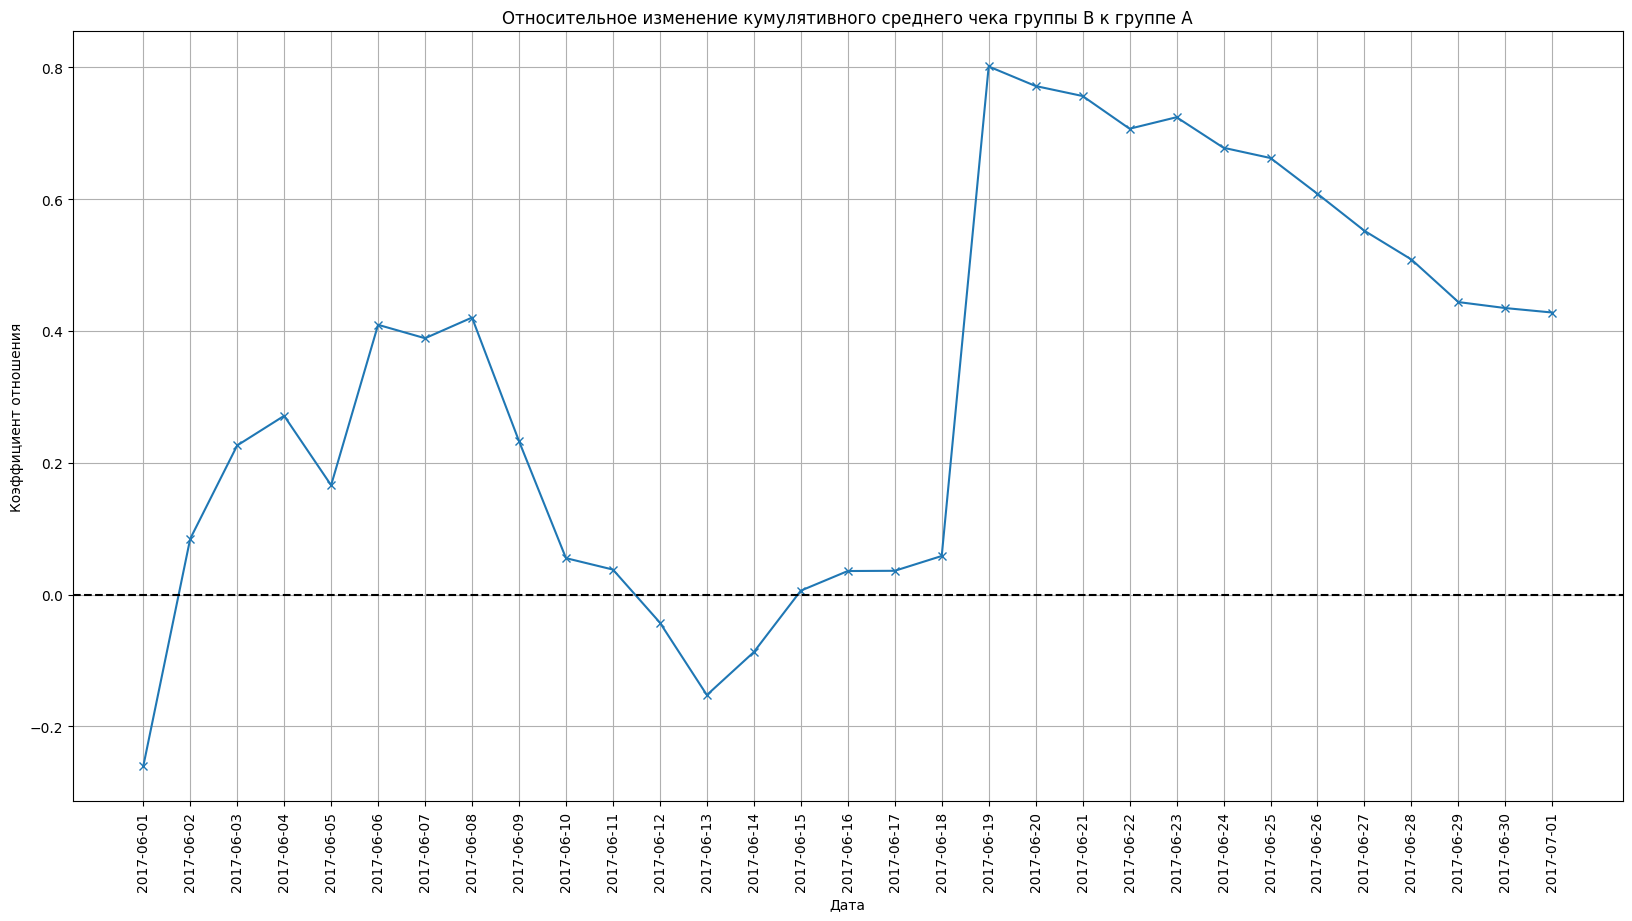

In [68]:
avg_check_by_group = cumulative_data.pivot_table(index='date', columns='group')['avg_check']

plt.figure(figsize=(20, 10))

plt.plot(avg_check_by_group['B'] / avg_check_by_group['A'] - 1, marker='x')
plt.axhline(y=0, color='black', linestyle='--');


plt.title('Относительное изменение кумулятивного среднего чека группы B к группе A')
plt.xlabel('Дата')
plt.ylabel('Коэффициент отношения')
plt.xticks(rotation=90)
plt.grid()
plt.show()

In [56]:
cumulative_data

,date,group,revenue,transaction_id,avg_check
0,2017-06-01,A,420253.3,24,17510.554167
1,2017-06-01,B,271805.0,21,12943.095238
2,2017-06-02,A,675365.2,44,15349.209091
3,2017-06-02,B,749183.1,45,16648.513333
4,2017-06-03,A,978317.6,68,14387.023529
...,...,...,...,...,...
57,2017-06-29,B,18755653.8,596,31469.217785
58,2017-06-30,A,11887305.6,545,21811.569908
59,2017-06-30,B,19402801.6,620,31294.841290
60,2017-07-01,A,12056583.8,557,21645.572352


4. График кумулятивного среднего количества заказов по группам. Опишите выводы

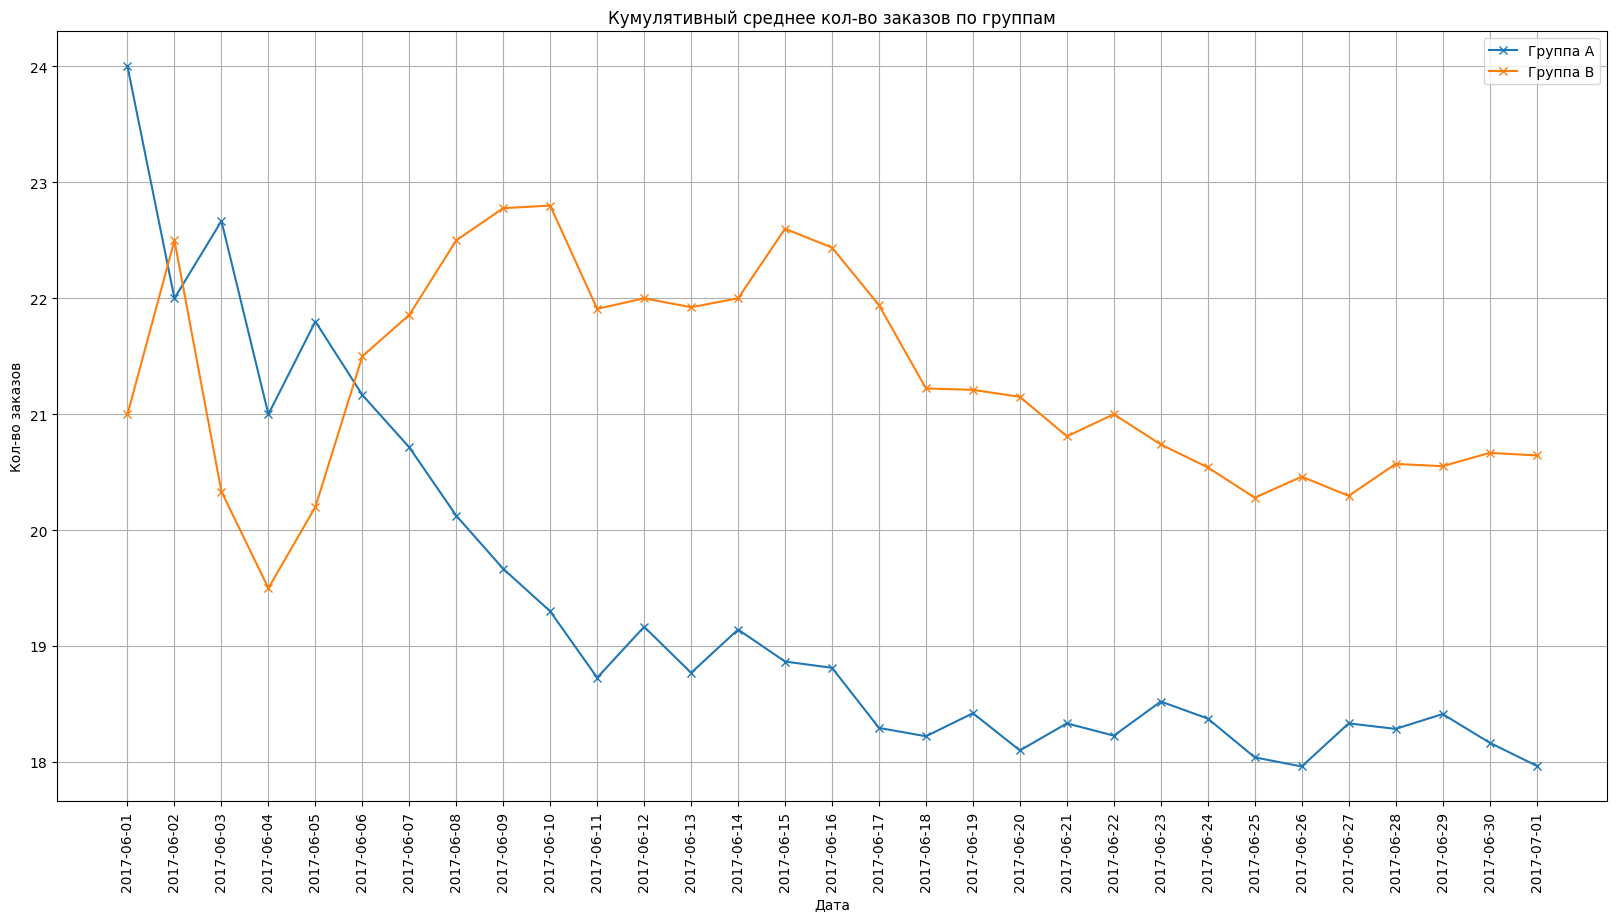

In [107]:
# сгруппировать данные по группе и дате и вычислить кумулятивное количество транзакций
cumulative_transactions = cumulative_data.groupby(['date', 'group'])['transactions'].sum()

# сгруппировать данные по группе и дате и вычислить количество дней
cumulative_days = cumulative_data.groupby(['date', 'group']).size().groupby(level=[1]).cumsum()

# вычислить кумулятивное среднее количество транзакций
cumulative_average_transactions = cumulative_transactions / cumulative_days

# вывести результат
cumulative_average_transactions = cumulative_average_transactions.reset_index()
cumulative_average_transactions.rename(columns = {0:'average_transactions'}, inplace=True)



plt.figure(figsize=(20, 10))
# построить график кумулятивного среднего чека по группам на каждый день
plt.plot(cumulative_average_transactions[cumulative_average_transactions['group'] == 'A']['date'], 
         cumulative_average_transactions[cumulative_average_transactions['group'] == 'A']['average_transactions'],
         marker='x',
         label='Группа A'
        )
plt.plot(cumulative_average_transactions[cumulative_average_transactions['group'] == 'B']['date'], 
         cumulative_average_transactions[cumulative_average_transactions['group'] == 'B']['average_transactions'], 
         marker='x',
         label='Группа B'
        )

# настройка отображения графика
plt.title('Кумулятивный среднее кол-во заказов по группам')
plt.xlabel('Дата')
plt.ylabel('Кол-во заказов')
plt.legend()
plt.xticks(rotation=90)
plt.grid()
plt.show()

5. График относительного изменения кумулятивного среднего количества заказов группы B к группе A

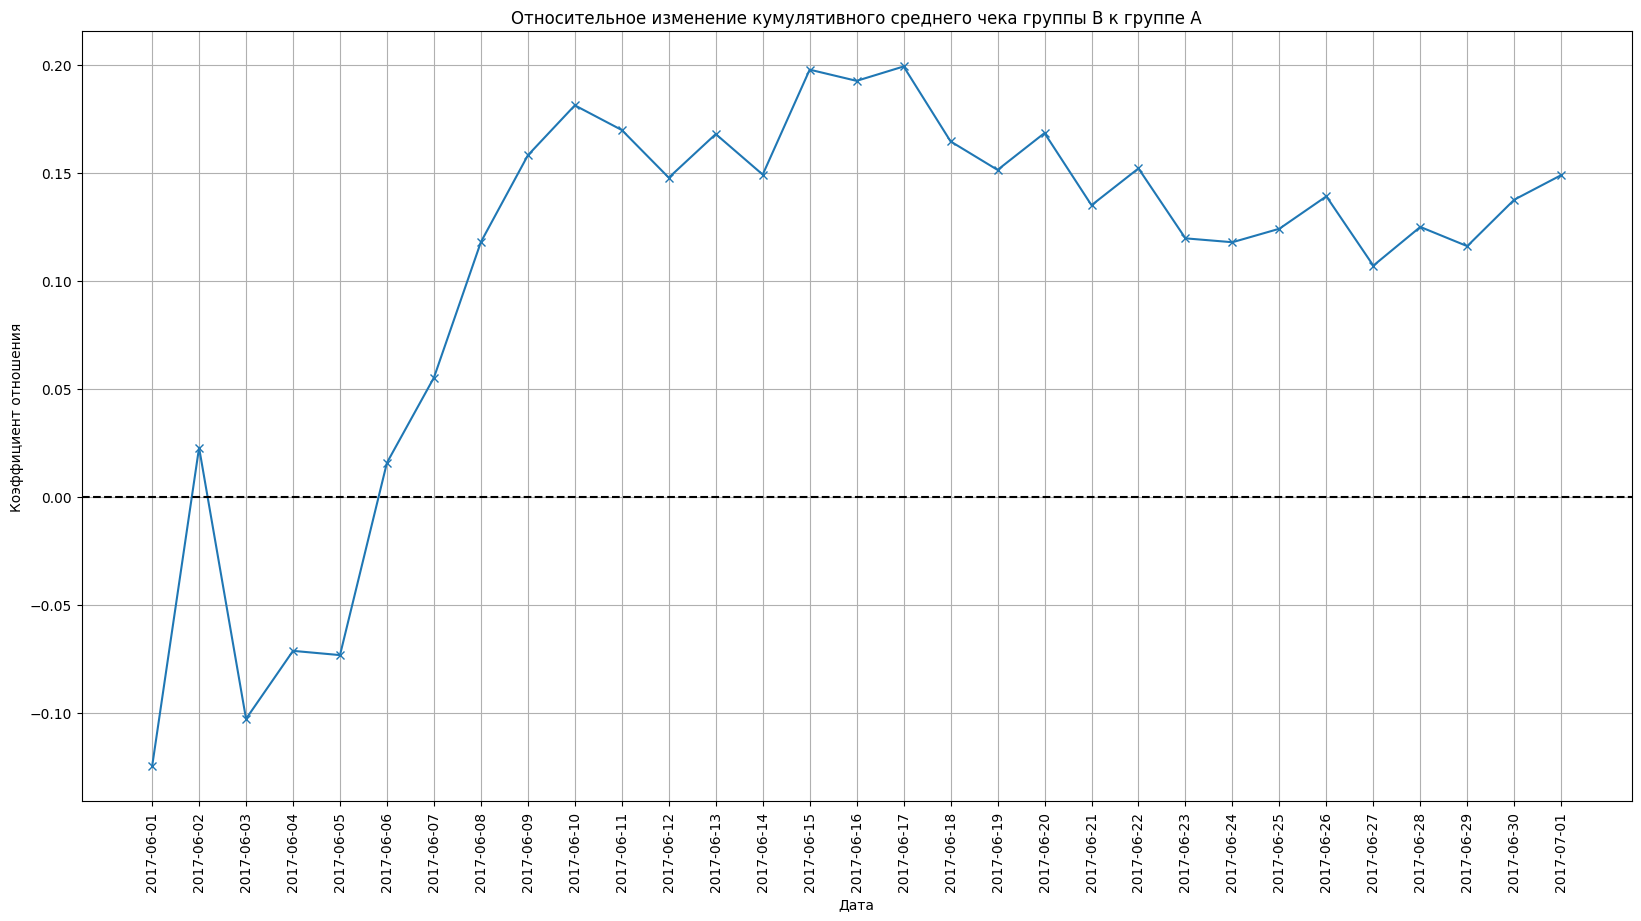

In [109]:
avg_transactions_by_group = cumulative_average_transactions.pivot_table(index='date', columns='group')['average_transactions']

plt.figure(figsize=(20, 10))

plt.plot(avg_transactions_by_group['B'] / avg_transactions_by_group['A'] - 1, marker='x')
plt.axhline(y=0, color='black', linestyle='--');


plt.title('Относительное изменение кумулятивного среднего чека группы B к группе A')
plt.xlabel('Дата')
plt.ylabel('Коэффициент отношения')
plt.xticks(rotation=90)
plt.grid()
plt.show()

6. Точечный график количества заказов по пользователям. Опишите выводы

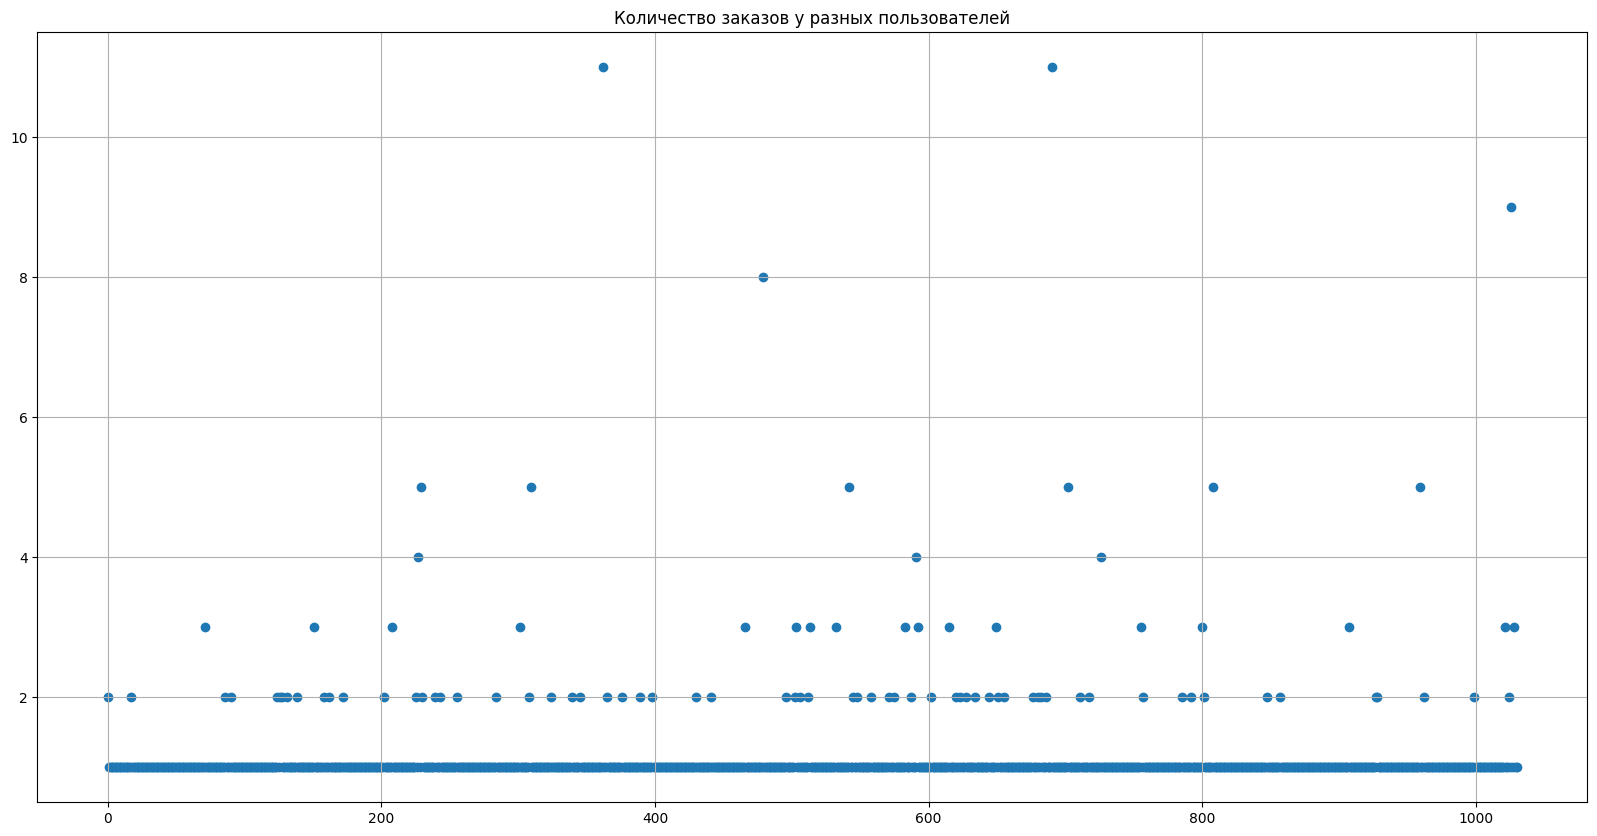

In [150]:
transactions_by_user = transactions.groupby('user_id').agg({'transaction_id': pd.Series.nunique})

plt.figure(figsize=(20, 10))
plt.scatter(x=np.arange(len(transactions_by_user)), y=transactions_by_user)
plt.title('Количество заказов у разных пользователей')
plt.grid()
plt.show();

7. Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.

In [219]:
transactions_percentile_95 = transactions_by_user.quantile(0.95)[0]
transactions_percentile_99 = transactions_by_user.quantile(0.99)[0]

print(f'95 перцентиль количества заказов на пользователя - {transactions_percentile_95}')
print(f'99 перцентиль количества заказов на пользователя - {transactions_percentile_99}')

95 перцентиль количества заказов на пользователя - 2.0
99 перцентиль количества заказов на пользователя - 4.0


8. Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.

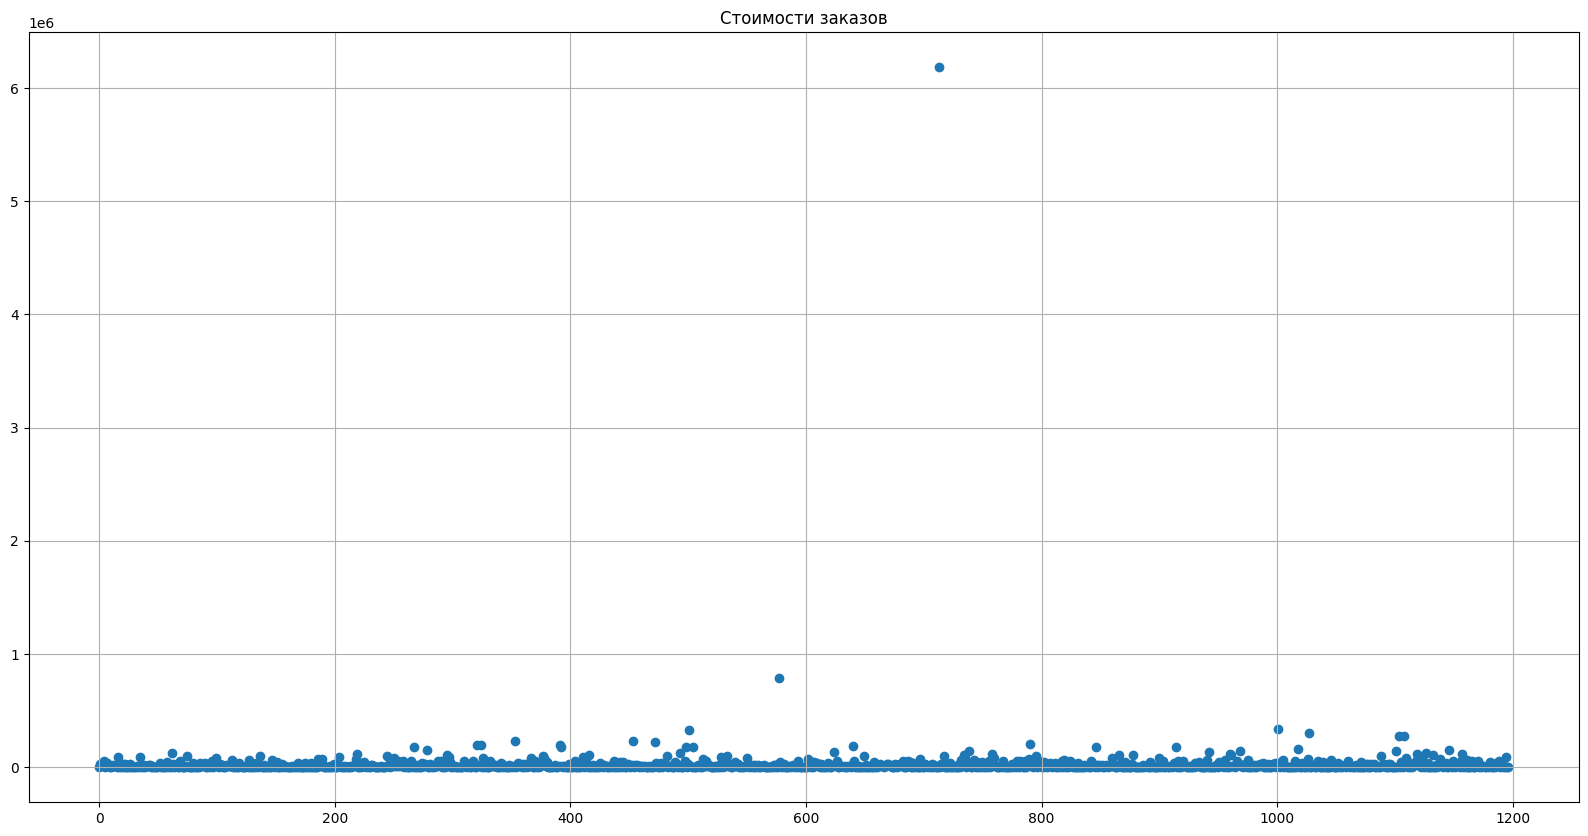

In [138]:
plt.figure(figsize=(20, 10))
plt.scatter(x = np.arange(transactions['revenue'].shape[0]), y=transactions['revenue'])
plt.title('Стоимости заказов')
plt.grid()
plt.show();

9. Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.

In [156]:
revenue_percentile_95 = transactions['revenue'].quantile(0.95)
revenue_percentile_99 = transactions['revenue'].quantile(0.99)

print(f'95 перцентиль стоимости заказов {round(revenue_percentile_95, 2)}')
print(f'99 перцентиль стоимости заказов {round(revenue_percentile_99, 2)}')

95 перцентиль стоимости заказов 87354.8
99 перцентиль стоимости заказов 197076.15


10. Посчитайте статистическую значимость различий в среднем количестве заказов между группами по «сырым» данным. Сделайте выводы и предположения.

In [222]:
count_transactions_A = transactions[transactions['group'] == 'A'].groupby('user_id').agg({'transaction_id': pd.Series.nunique})['transaction_id']
count_transactions_B = transactions[transactions['group'] == 'B'].groupby('user_id').agg({'transaction_id': pd.Series.nunique})['transaction_id']

st.ttest_ind(count_transactions_B, count_transactions_A, alternative='greater')

Ttest_indResult(statistic=-0.5224474609480537, pvalue=0.6992673627744339)

11. Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.

In [256]:
revenue_A = transactions[transactions['group'] == 'A']['revenue']
revenue_B = transactions[transactions['group'] == 'B']['revenue']

st.ttest_ind(revenue_B, revenue_A, alternative='greater')

Ttest_indResult(statistic=0.8728080518232938, pvalue=0.1914715253673705)

12. Посчитайте статистическую значимость различий в среднем количестве заказов между группами по «очищенным» данным. Сделайте выводы и предположения.

In [223]:
count_transactions_A = count_transactions_A[count_transactions_A <= transactions_percentile_99]
count_transactions_B = count_transactions_B[count_transactions_B <= transactions_percentile_99]

st.ttest_ind(count_transactions_B, count_transactions_A, alternative='greater')

Ttest_indResult(statistic=-0.132349984935157, pvalue=0.552633959953039)

13. Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.

In [257]:
revenue_A = revenue_A[revenue_A < revenue_percentile_95]
revenue_B = revenue_B[revenue_B < revenue_percentile_95]

st.ttest_ind(revenue_B, revenue_A, alternative='greater')

Ttest_indResult(statistic=-0.26279188249078755, pvalue=0.6036206574013547)

14. Примите решение по результатам теста и объясните его.14. Варианты решений:   
*  Остановить тест, зафиксировать победу одной из групп.  
*  Остановить тест, зафиксировать отсутствие различий между группами.  
*  Продолжить тест.

In [284]:
alpha = .05
betta = .2
sigma_A = revenue_A.var(ddof=1)
sigma_B = revenue_B.var(ddof=1)
effect = revenue_A.mean() * 0.115 # Я подобрал такой эффект, чтобы нам хватало выборки

n = (st.norm.ppf(1-alpha/2) + st.norm.ppf(1-betta)) * (sigma_A + sigma_B) / effect ** 2

print('необходимое число элементов в выборке, чтобы зафиксировать прирост метрики на 11.5% - ', int(n))

необходимое число элементов в выборке, чтобы зафиксировать прирост метрики на 11.5% -  641


Чтобы зафиксировать разницу в 11.5% прироста метрики, нам достаточно элементов, однако исходя из статистических тестов - статистически значимой разницы нет.  

Варианта два:

* Либо разницы действительно нет, и останавливаем тест
* Либо разница меньше 11.5%, тогда, если у нас есть время, можно еще подержать тест